Project on California House Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
!pip install folium
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

In [4]:
df.describe()

longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.000000   273.00000       2.544000   
50%        437.000000   1155.000000   409.50000       3.487150   
75%        636.000000   1742.750000   597.25000       4.656475   
max       5419.000000  11935.000000  4930.00000      15.000100   

       median_house_value  
count          3000.00000  
mean         205846.27500  
std          113119.68747  
min           22500.00000  
25%          121200.00000  
50%          177650.00000  
75%          263975.00000  
max          500001.00000

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [7]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [8]:
lr = LinearRegression()

In [9]:
X,y = df.drop(['households'], axis=1), df.households
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train.shape,y_test.shape

((2400, 8), (600,))

In [11]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [12]:
# Make predictions on the same data you used for training (not recommended for real-world evaluation)
y_pred = lr.predict(X)

#Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 39.10495568658785
Mean Squared Error (MSE): 5151.20819629265
R-squared (R2): 0.9614110621904342


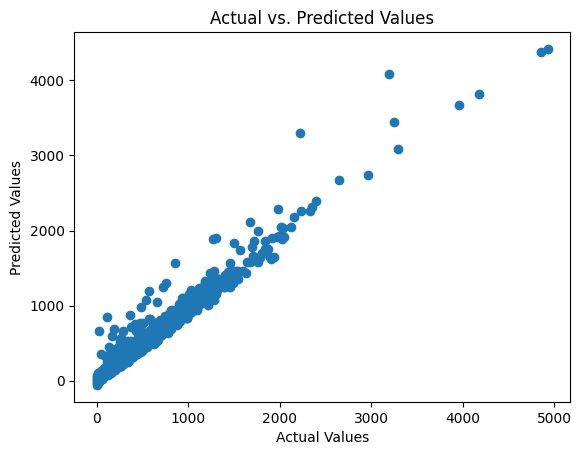

In [13]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

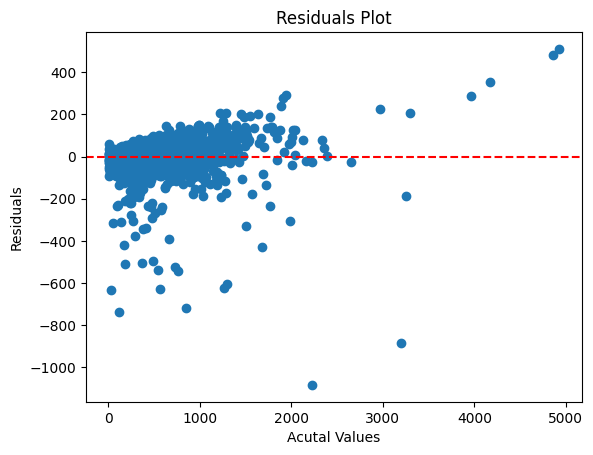

In [14]:
residuals = y - y_pred
plt.scatter(y, residuals)
plt.xlabel("Acutal Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.show()

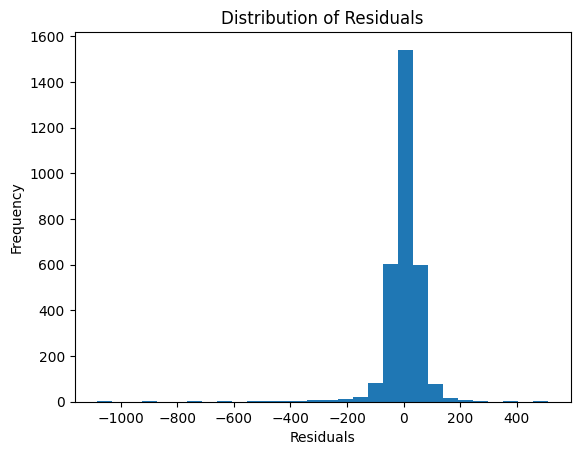

In [15]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

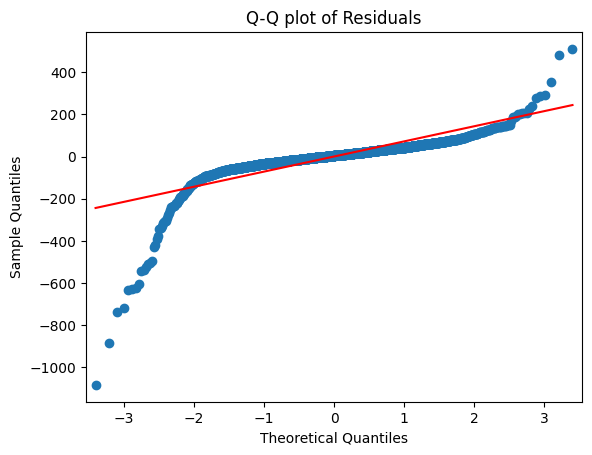

In [16]:
qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [17]:
m = folium.Map(location=(37.37, -122.05))

In [18]:
m

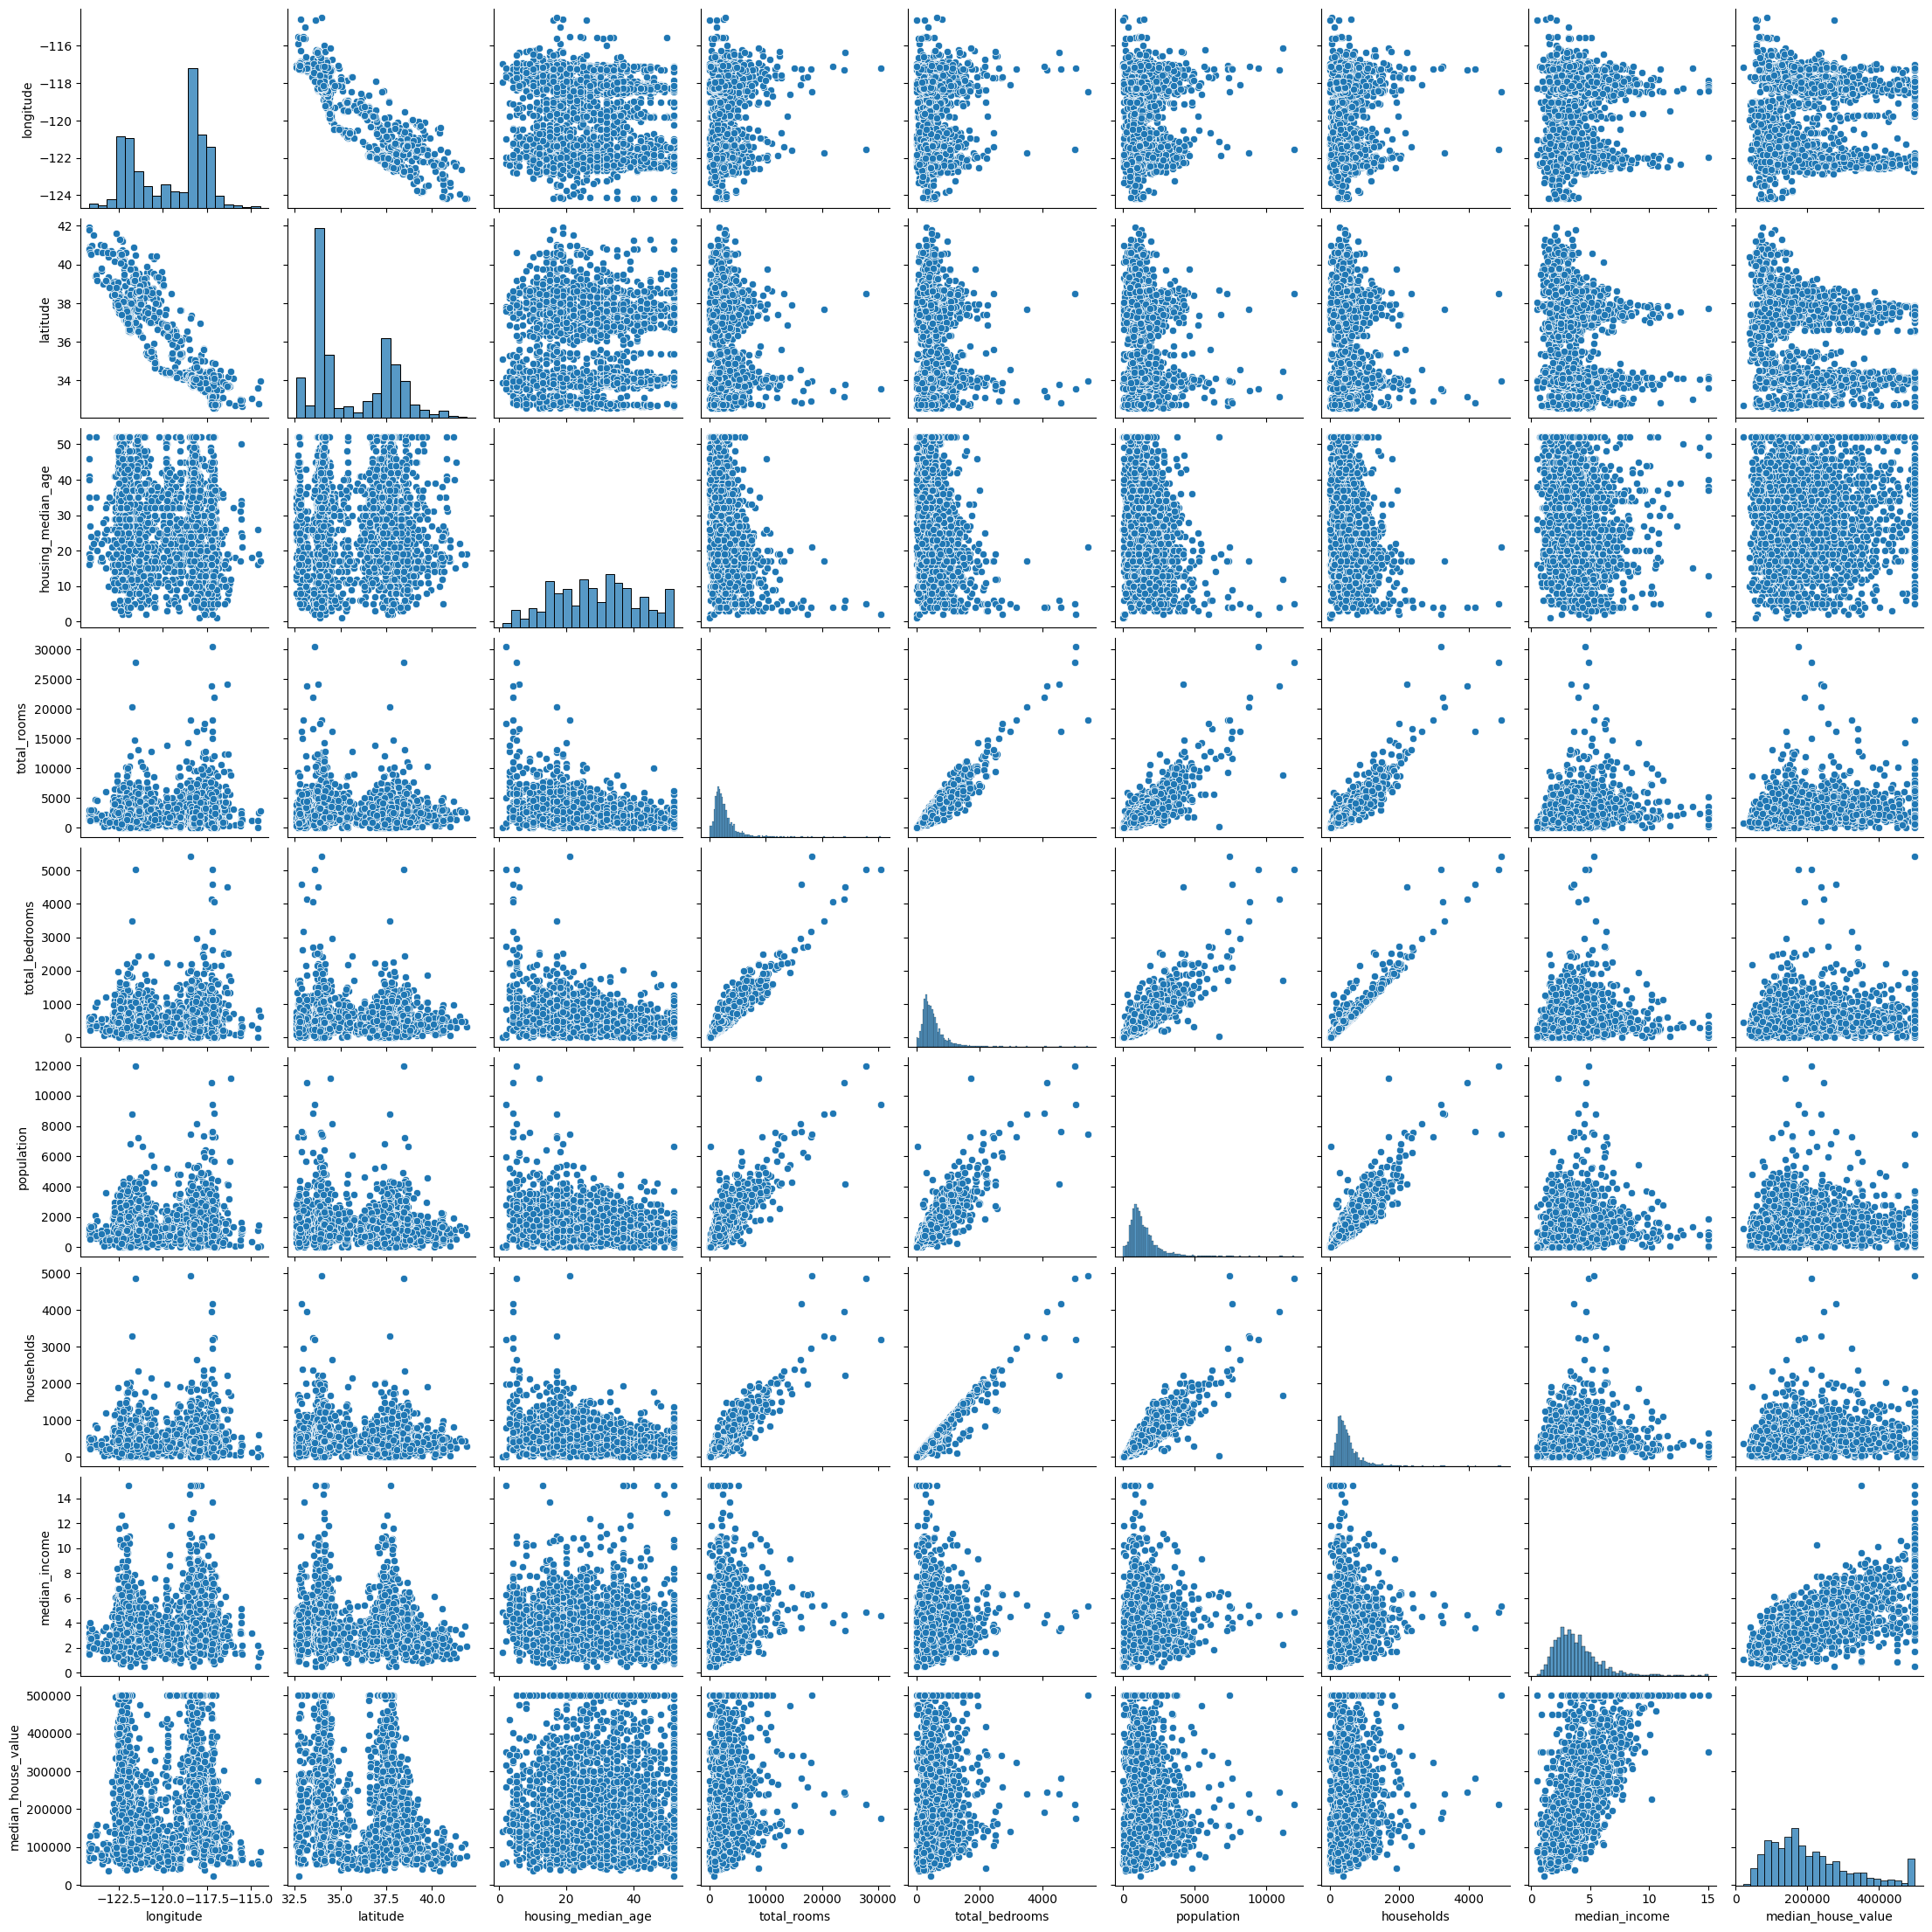

In [19]:
sn.pairplot(df)
plt.show()

In [20]:

# Create a Folium map centered at a specific location
m = folium.Map(location=[37.37, -122.05], zoom_start=8)

# Add markers for each data point in the DataFrame
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['median_house_value']).add_to(m)

# Display the map
m


In [21]:

# Create a Folium map centered at a specific location
m = folium.Map(location=[36.33, -119.67], zoom_start=10)


# Add markers for each data point in the DataFrame
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['median_house_value']).add_to(m)

# Display the map
m
